# Predicting diamond's price

#### For more info, please refer to the Kaggle competition. Also, dataset can be found here. 

##### Datasets used for this training can be found in data folder or in the link above. Please refer to diamonds_train to train and test the model and diamonds_predict to predict prices.

## 1. Importing libraries

### 1.1. Importing machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

### 1.2. Importing other libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1.3. Importing datasets

In [4]:
diamonds_train = pd.read_csv('../data/diamonds_train.csv')
diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')

## 2. Exploring dataset

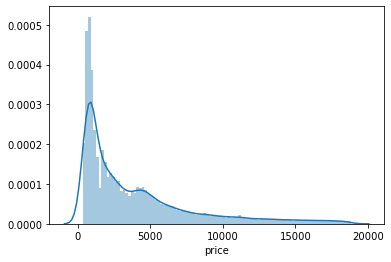

In [5]:
price = diamonds_train['price']
sns.distplot(price, bins=100)

In [6]:
diamonds_train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.026528,0.183392,0.921935,0.975688,0.951667,0.967570
depth,0.026528,1.000000,-0.293114,-0.014864,-0.026348,-0.030966,0.094655
table,0.183392,-0.293114,1.000000,0.130111,0.196059,0.184673,0.155189
price,0.921935,-0.014864,0.130111,1.000000,0.885848,0.866163,0.874500
x,0.975688,-0.026348,0.196059,0.885848,1.000000,0.973712,0.984876
y,0.951667,-0.030966,0.184673,0.866163,0.973712,1.000000,0.964828
z,0.967570,0.094655,0.155189,0.874500,0.984876,0.964828,1.000000


In [4]:
diamonds_train['cut']=diamonds_train['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3, 'Ideal':4})
diamonds_train['color']=diamonds_train['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F': 4, 'E': 5, 'D':6})
diamonds_train['clarity']=diamonds_train['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})
#cambiamos en predict
diamonds_predict['cut']=diamonds_predict['cut'].map({'Fair':0,'Good':1,'Very Good':2,'Premium':3, 'Ideal':4})
diamonds_predict['color']=diamonds_predict['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F': 4, 'E': 5, 'D':6})
diamonds_predict['clarity']=diamonds_predict['clarity'].map({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7})

In [5]:
diamonds_train['cut/wt'] = diamonds_train['cut']/diamonds_train['carat']
diamonds_train['color/wt'] = diamonds_train['color']/diamonds_train['carat']
diamonds_train['clarity/wt'] = diamonds_train['clarity']/diamonds_train['carat']
#diamonds_train = diamonds_train.drop(['cut','color','clarity','depth'], axis=1)
diamonds_predict['cut/wt'] = diamonds_predict['cut']/diamonds_predict['carat']
diamonds_predict['color/wt'] = diamonds_predict['color']/diamonds_predict['carat']
diamonds_predict['clarity/wt'] = diamonds_predict['clarity']/diamonds_predict['carat']
#diamonds_predict = diamonds_predict.drop(['cut','color','clarity','depth'], axis=1)

In [6]:
diamonds_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut/wt', 'color/wt', 'clarity/wt'],
      dtype='object')

In [7]:
scaller = StandardScaler()
columns_df = ['carat', 'cut', 'color', 'depth', 'cut/wt', 'color/wt', 'clarity/wt']
X = scaller.fit_transform(diamonds_train[columns_df])
Y = diamonds_train['price'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [8]:
model = lgb.LGBMRegressor()
param_dist = {'num_leaves': [35, 40, 45, 50],
             'min_data_in_leaf': [10, 15, 20, 30, 40],
             'max_depth': [25, 30, 35, 40, 45]}
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [9]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = RandomizedSearchCV(model, 
                                 param_grid, 
                                 cv=5, 
                                 verbose=10, 
                                 scoring='neg_root_mean_squared_error', 
                                 n_jobs=-1,
                                 n_iter=32)

grid_search.fit(X, Y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.6min finished


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=32, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]},
                   scoring='neg_root_mean_squared_error', verbose=10)

In [10]:
grid_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 3,
 'max_depth': 110,
 'bootstrap': True}

In [11]:
grid_search.best_score_

-539.0363030818914

In [12]:
y_pred = grid_search.predict(diamonds_predict[columns_df])

In [ ]:
rmse=np.sqrt(mean_squared_error(Y_test,y_pred, squared=False))
print("rmse: %f" %(rmse))

In [ ]:
X_test = scaller.transform(diamonds_predict[columns_df].values)
y_hat = model.predict(X_test).clip(0, 20000)
submission = pd.DataFrame({'id': diamonds_predict['id'], 'price': y_hat})
submission.to_csv('../data/prueba_pepino.csv', index=False)